#Problem 1
After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('train.csv')
df = data[['GrLivArea', 'YearBuilt', 'SalePrice']]

In [ ]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,2].to_numpy()

Divide data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
print("mean:{}\nvar:{}".format(scaler.mean_, scaler.var_))

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mean:[1511.06575342 1971.80091324]
var:[286058.21668105    918.40785305]


#[Problem 2] Estimation and evaluation by linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.score(X_train, y_train))
y_pred = linreg.predict(X_test)

0.648269814736006


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("MSE:   {}\nRMSE:  {}".format(MSE, RMSE))

MSE:   1996044388.5837965
RMSE:  44677.112581094545


In [ ]:
m1 = np.hstack((X_test, y_test[:, None], np.zeros((len(X_test), 1))))
m2 = np.hstack((X_test, y_pred[:, None], np.ones((len(X_test), 1))))
m = pd.DataFrame(np.vstack((m1, m2)), columns=['GrLivArea', 'Yearbuild', 'SalePrice', 'type'])

<Figure size 720x720 with 0 Axes>

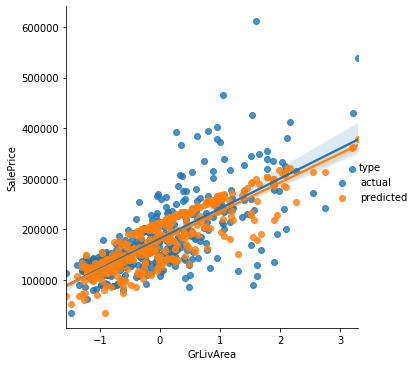

In [ ]:
plt.figure(figsize=(10, 10))
g = sns.lmplot(x='GrLivArea', y='SalePrice', data=m,  hue='type', legend_out=True)
new_labels = ['actual', 'predicted']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

<Figure size 720x720 with 0 Axes>

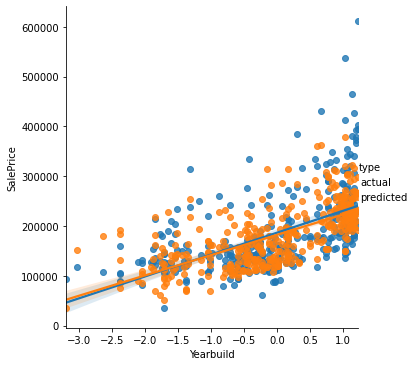

In [ ]:
plt.figure(figsize=(10, 10))
g = sns.lmplot(x='Yearbuild', y='SalePrice', data=m,  hue='type', legend_out=True)
new_labels = ['actual', 'predicted']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#Problem 3

Learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Take a brief look at the results using the table and the visualized diagram. Please state which method was good for which index value and what kind of figure it was.

In [ ]:
def visualize(data, x_label, y_label, hue_label):
  plt.figure(figsize=(10, 10))
  g = sns.lmplot(x=x_label, y=y_label, data=data,  hue=hue_label, legend_out=True)
  new_labels = ['actual', 'predicted']
  for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

def evaluate(y_pred, y_test):
  MSE  = mean_squared_error(y_test, y_pred)
  RMSE = mean_squared_error(y_test, y_pred, squared=False)

  print("MSE:   {}\nRMSE:  {}\n".format(MSE, RMSE))


def train_model(X_train, y_train, X_test, y_test, model, with_visual=False, with_evaluation=False):
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  if with_evaluation: evaluate(y_pred, y_test)

  m1 = np.hstack((X_test, y_test[:, None], np.zeros((len(X_test), 1))))
  m2 = np.hstack((X_test, y_pred[:, None], np.ones((len(X_test), 1))))
  m = pd.DataFrame(np.vstack((m1, m2)), columns=['GrLivArea', 'Yearbuild', 'SalePrice', 'type'])

  if with_visual:
    visualize(m, 'GrLivArea', 'SalePrice', 'type')
    visualize(m, 'Yearbuild', 'SalePrice', 'type')

MSE:   2231159680.161743
RMSE:  47235.15301300233



<Figure size 720x720 with 0 Axes>

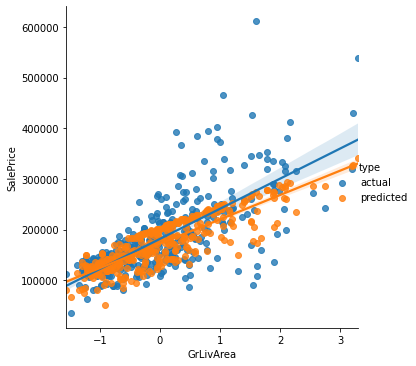

<Figure size 720x720 with 0 Axes>

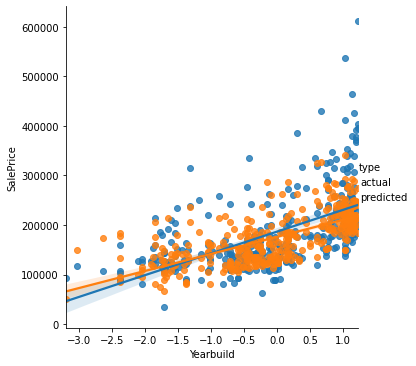

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

svr = SVR(kernel='linear', C=1000, gamma='auto')

train_model(X_train, y_train, X_test, y_test, svr, with_visual=True, with_evaluation=True)

MSE:   3299014100.5650687
RMSE:  57437.04467123173



<Figure size 720x720 with 0 Axes>

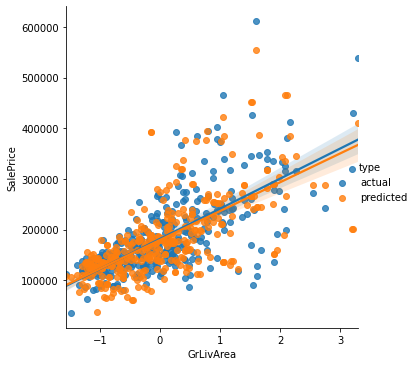

<Figure size 720x720 with 0 Axes>

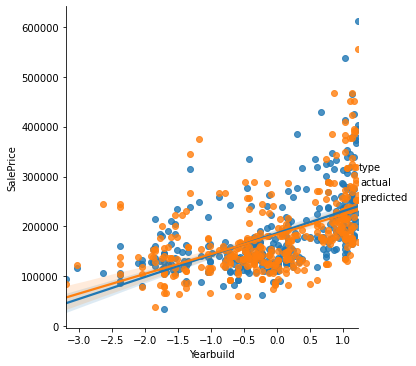

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
train_model(X_train, y_train, X_test, y_test, regressor, with_visual=True, with_evaluation=True)

MSE:   1953421952.079637
RMSE:  44197.53332573705



<Figure size 720x720 with 0 Axes>

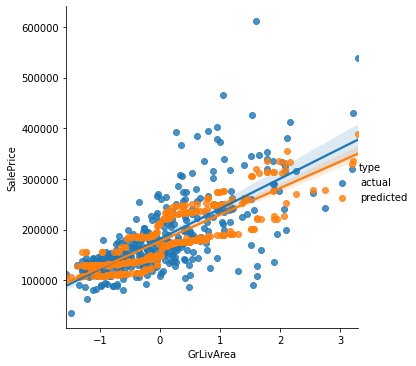

<Figure size 720x720 with 0 Axes>

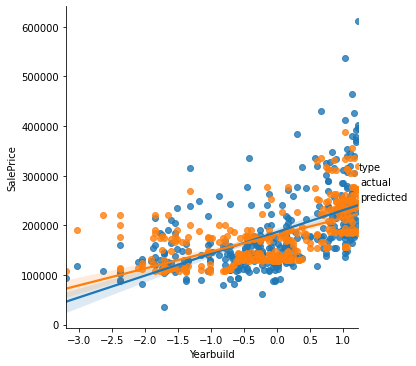

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)

train_model(X_train, y_train, X_test, y_test, regr, with_visual=True, with_evaluation=True)

#[Problem 4] (Advance assignment) Learning using other features

In [44]:
data = pd.read_csv('train.csv')
df = data[['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd', 'SalePrice']]

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
print("mean:{}\nvar:{}".format(scaler.mean_, scaler.var_))

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mean:[1527.45936073 1970.82465753    6.12054795 1984.76621005]
var:[2.90510944e+05 9.07766515e+02 1.90327641e+00 4.22610182e+02]


In [49]:
def train_model_multi(X_train, y_train, X_test, y_test, model, with_visual=False, with_evaluation=False, feature_name=[]):
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  if with_evaluation: evaluate(y_pred, y_test)

  m1 = np.hstack((X_test, y_test[:, None], np.zeros((len(X_test), 1))))
  m2 = np.hstack((X_test, y_pred[:, None], np.ones((len(X_test), 1))))
  m = pd.DataFrame(np.vstack((m1, m2)), columns=[*feature_name, 'SalePrice', 'type'])

  if with_visual:
    for i in feature_name:
      visualize(m, i, 'SalePrice', 'type')

MSE:   1623867712.7919421
RMSE:  40297.24199981857



<Figure size 720x720 with 0 Axes>

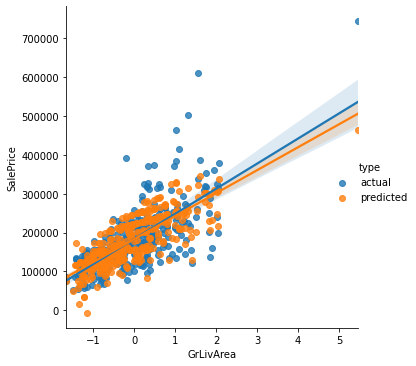

<Figure size 720x720 with 0 Axes>

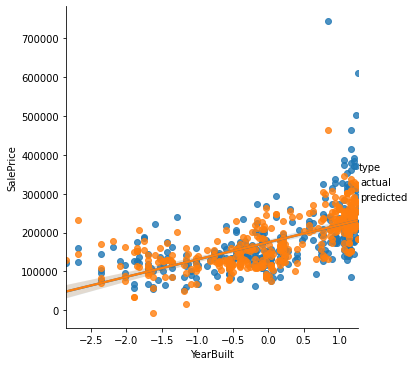

<Figure size 720x720 with 0 Axes>

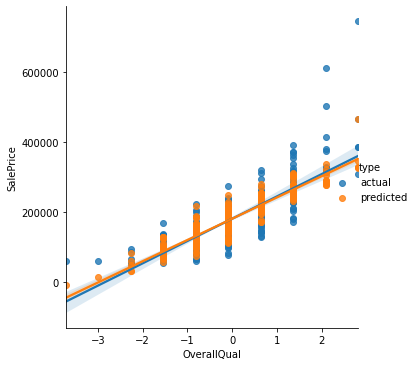

<Figure size 720x720 with 0 Axes>

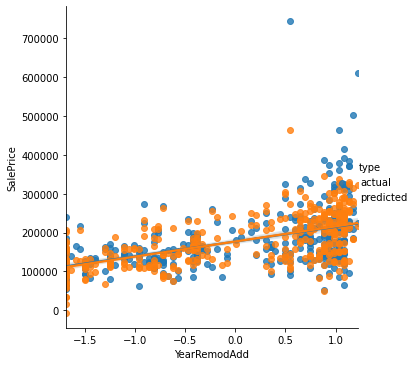

In [50]:
linreg = LinearRegression()
train_model_multi(X_train, y_train, X_test, y_test, linreg, with_visual=True, with_evaluation=True, feature_name=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

MSE:   1438155951.3739727
RMSE:  37923.0266642046



<Figure size 720x720 with 0 Axes>

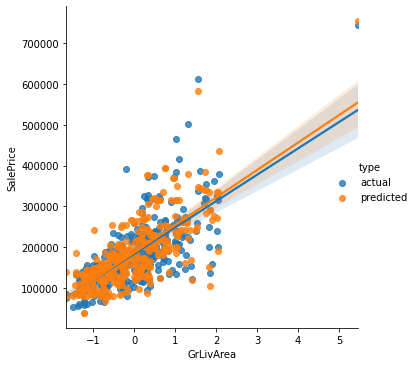

<Figure size 720x720 with 0 Axes>

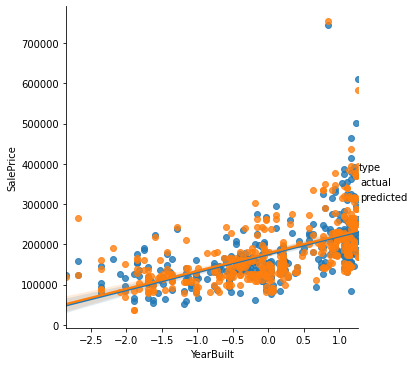

<Figure size 720x720 with 0 Axes>

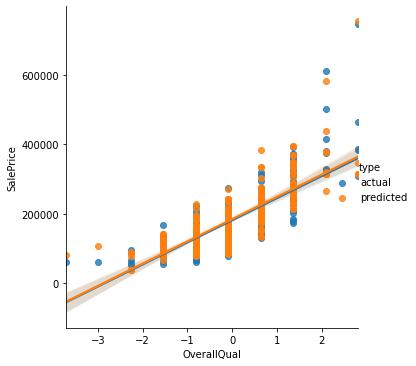

<Figure size 720x720 with 0 Axes>

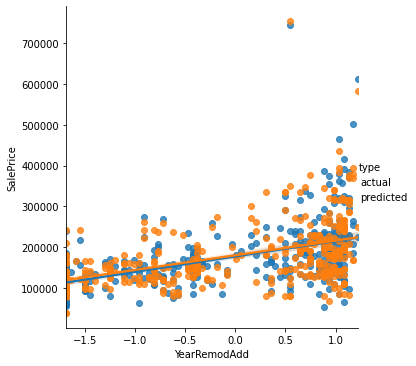

In [51]:
regressor = DecisionTreeRegressor(random_state=0)
train_model_multi(X_train, y_train, X_test, y_test, regressor, with_visual=True, with_evaluation=True, feature_name=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])